<img src="http://reiner-lemoine-institut.de//wp-content/uploads/2015/09/rlilogo.png" alt="RLI" height="100" width="100" align="right"/>

# UML - germany data structure

This script uses the package _iplantuml_ for plotting UML. <br>
See tutorial for installation and other instructions.

In [1]:
__copyright__ = "Reiner Lemoine Institut"
__license__   = "GNU Affero General Public License Version 3 (AGPL-3.0)"
__url__       = "https://github.com/OpenEnergyPlatform/examples/blob/master/LICENSE"
__author__    = "oakca"

In [2]:
import iplantuml

# Contents

The following UML diagrams will be displayed in the following:
1. germany UML Diagrams - Actual State
2. germany UML Diagrams - Reworked & Normalized

## germany UML Diagrams - Actual State

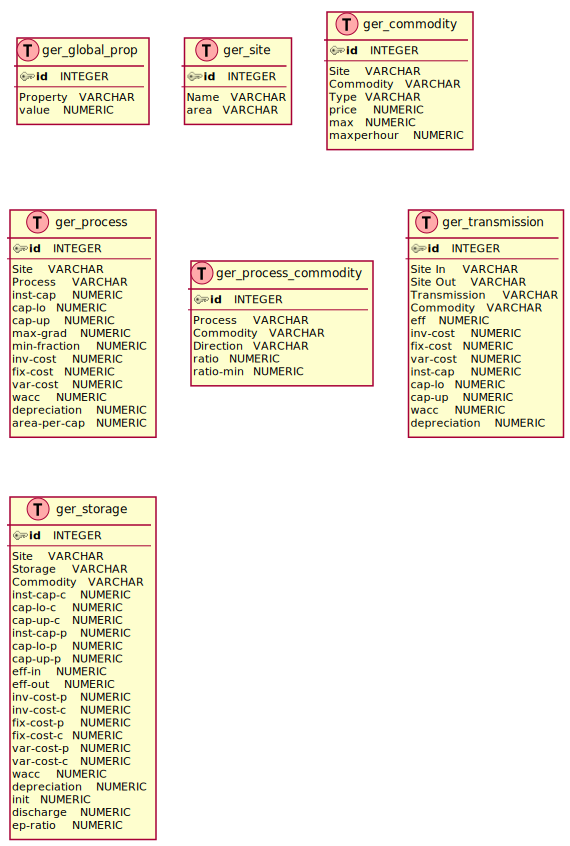

In [3]:
%%plantuml --jar

@startuml
'ERM definitions:

skinparam tabSize 2
sprite $key [17x12/16z] bOqv3e1030CJRzPn9Fx_NWY7n4eqJ3TJs6OVa5pTpD-5tl3YyFHG-4DsqAOnWgawWp0r0KGagDuGMYMJxbMrBxzLPJ_O0G00
!define Table(name,desc) class name as "desc" << (T,#FFAAAA) >>
!define primary_key(x) <$key><b>x</b>
!define foreign_key(x) <$key>x
!define unique <b>U</b>
!define not_null <b>N</b> 
hide methods
hide stereotypes
                                                  
Table(t1, "ger_global_prop") {
    primary_key(id) \t INTEGER
    --
    Property \t VARCHAR
    value \t NUMERIC
}


Table(t2, "ger_site") {
    primary_key(id) \t INTEGER
    --
    Name \t VARCHAR
    area \t VARCHAR
}


Table(t3, "ger_commodity") {
    primary_key(id) \t INTEGER
    --
    Site \t VARCHAR
    Commodity \t VARCHAR
    Type \t VARCHAR
    price \t NUMERIC
    max \t NUMERIC
    maxperhour \t NUMERIC
}


Table(t4, "ger_process") {
    primary_key(id) \t INTEGER
    --
    Site \t VARCHAR
    Process \t VARCHAR
    inst-cap \t NUMERIC
    cap-lo \t NUMERIC
    cap-up \t NUMERIC
    max-grad \t NUMERIC
    min-fraction \t NUMERIC
    inv-cost \t NUMERIC
    fix-cost \t NUMERIC
    var-cost \t NUMERIC
    wacc \t NUMERIC
    depreciation \t NUMERIC
    area-per-cap \t NUMERIC
}


Table(t5, "ger_process_commodity") {
    primary_key(id) \t INTEGER
    --
    Process \t VARCHAR
    Commodity \t VARCHAR
    Direction \t VARCHAR
    ratio \t NUMERIC
    ratio-min \t NUMERIC
}


Table(t6, "ger_transmission") {
    primary_key(id) \t INTEGER
    --
    Site In \t VARCHAR
    Site Out \t VARCHAR
    Transmission \t VARCHAR
    Commodity \t VARCHAR
    eff \t NUMERIC
    inv-cost \t NUMERIC
    fix-cost \t NUMERIC
    var-cost \t NUMERIC
    inst-cap \t NUMERIC
    cap-lo \t NUMERIC
    cap-up \t NUMERIC
    wacc \t NUMERIC
    depreciation \t NUMERIC
}


Table(t7, "ger_storage") {
    primary_key(id) \t INTEGER
    --
    Site \t VARCHAR
    Storage \t VARCHAR
    Commodity \t VARCHAR
    inst-cap-c \t NUMERIC
    cap-lo-c \t NUMERIC
    cap-up-c \t NUMERIC
    inst-cap-p \t NUMERIC
    cap-lo-p \t NUMERIC
    cap-up-p \t NUMERIC
    eff-in \t NUMERIC
    eff-out \t NUMERIC
    inv-cost-p \t NUMERIC
    inv-cost-c \t NUMERIC
    fix-cost-p \t NUMERIC
    fix-cost-c \t NUMERIC
    var-cost-p \t NUMERIC
    var-cost-c \t NUMERIC
    wacc \t NUMERIC
    depreciation \t NUMERIC
    init \t NUMERIC
    discharge \t NUMERIC
    ep-ratio \t NUMERIC
}


@enduml
                                                  

## germany UML Diagrams - Reworked & Normalized

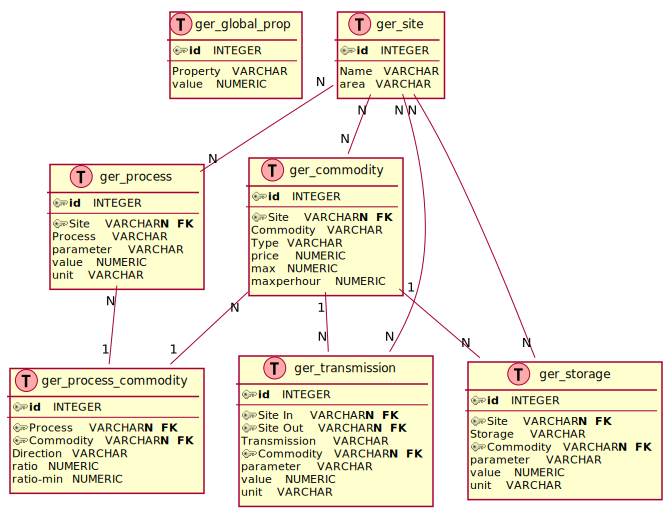

In [4]:
%%plantuml --jar

@startuml
'ERM definitions:
skinparam tabSize 2
sprite $key [17x12/16z] bOqv3e1030CJRzPn9Fx_NWY7n4eqJ3TJs6OVa5pTpD-5tl3YyFHG-4DsqAOnWgawWp0r0KGagDuGMYMJxbMrBxzLPJ_O0G00
!define Table(name,desc) class name as "desc" << (T,#FFAAAA) >>
!define primary_key(x) <$key><b>x</b>
!define foreign_key(x) <$key>x
!define unique <b>U</b>
!define not_null <b>N</b> 
!define foreign <b>FK</b> 
hide methods
hide stereotypes


Table(glob, "ger_global_prop") {
    primary_key(id) \t INTEGER
    --
    Property \t VARCHAR
    value \t NUMERIC
}


Table(sit, "ger_site") {
    primary_key(id) \t INTEGER
    --
    Name \t VARCHAR
    area \t VARCHAR
}


Table(com, "ger_commodity") {
    primary_key(id) \t INTEGER
    --
    foreign_key(Site) \t VARCHAR not_null foreign
    Commodity \t VARCHAR
    Type \t VARCHAR
    price \t NUMERIC
    max \t NUMERIC
    maxperhour \t NUMERIC
}


Table(pro, "ger_process") {
    primary_key(id) \t INTEGER
    --
    foreign_key(Site) \t VARCHAR not_null foreign
    Process \t VARCHAR
    parameter \t VARCHAR
    value \t NUMERIC
    unit \t VARCHAR
}


Table(procom, "ger_process_commodity") {
    primary_key(id) \t INTEGER
    --
    foreign_key(Process) \t VARCHAR not_null foreign
    foreign_key(Commodity) \t VARCHAR not_null foreign
    Direction \t VARCHAR
    ratio \t NUMERIC
    ratio-min \t NUMERIC
}


Table(tra, "ger_transmission") {
    primary_key(id) \t INTEGER
    --
    foreign_key(Site In) \t VARCHAR not_null foreign
    foreign_key(Site Out) \t VARCHAR not_null foreign
    Transmission \t VARCHAR
    foreign_key(Commodity) \t VARCHAR not_null foreign
    parameter \t VARCHAR
    value \t NUMERIC
    unit \t VARCHAR
}


Table(sto, "ger_storage") {
    primary_key(id) \t INTEGER
    --
    foreign_key(Site) \t VARCHAR not_null foreign
    Storage \t VARCHAR
    foreign_key(Commodity) \t VARCHAR not_null foreign
    parameter \t VARCHAR
    value \t NUMERIC
    unit \t VARCHAR
}
                                                  
sit "N" -- "N" com
sit "N" -- "N" pro
sit "N" -- "N" tra
sit "N" -- "N" sto
com "N" -- "1" procom
pro "N" -- "1" procom
com "1" -- "N" tra
com "1" -- "N" sto
                                                  
@enduml